<a href="https://colab.research.google.com/github/Anubhav-singh-lab/Deep_learning_assignment/blob/main/dlassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8297 - loss: 0.6643 - val_accuracy: 0.9008 - val_loss: 0.3615
Epoch 2/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9047 - loss: 0.3404 - val_accuracy: 0.9186 - val_loss: 0.2966
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9176 - loss: 0.2898 - val_accuracy: 0.9281 - val_loss: 0.2606
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9276 - loss: 0.2573 - val_accuracy: 0.9359 - val_loss: 0.2369
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9337 - loss: 0.2330 - val_accuracy: 0.9395 - val_loss: 0.2148

Training with Adam optimizer...
Epoch 1/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9257 - loss: 0.2593 - val_accuracy: 0.9571 - val_loss: 0.1376
Epoch 2/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9657 - loss: 0.1151 - val_accuracy: 0.9698 - val_loss: 0.0991
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9762 - loss: 0.0786 - val_accuracy: 0.9710 - val_loss: 0.0900
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9820 - loss: 0.0594 -

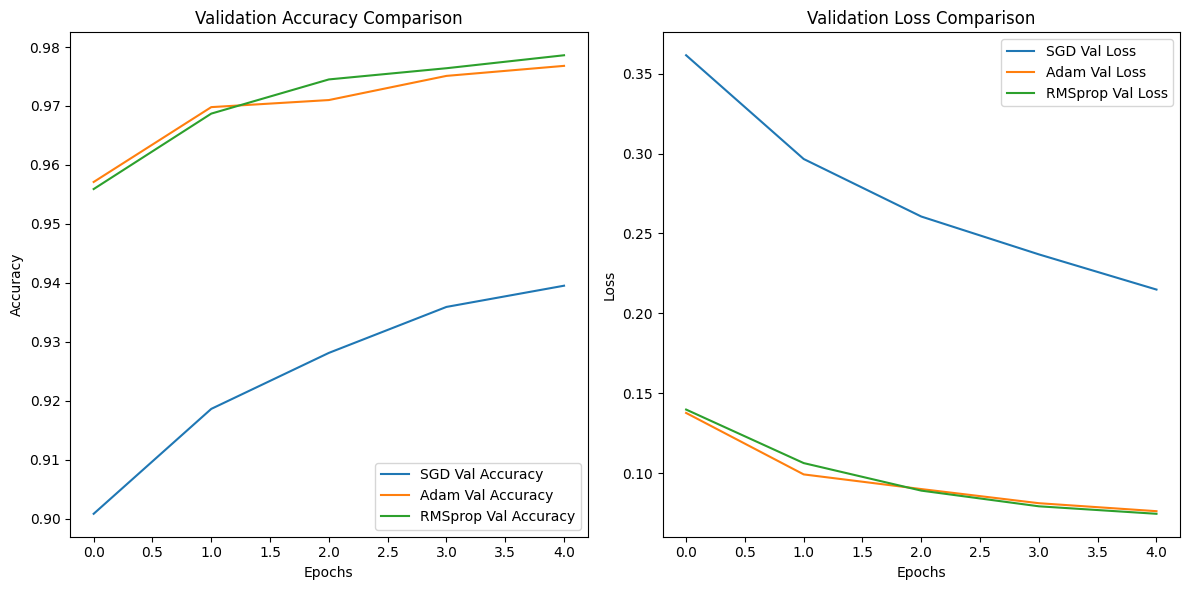


Final test accuracies:
SGD Test Accuracy: 0.9395
Adam Test Accuracy: 0.9768
RMSprop Test Accuracy: 0.9786


In [1]:
Ans 7

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
     return model


optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop()
}


history = {}
for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer...")
    model = create_model(optimizer)
    history[optimizer_name] = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=2)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for optimizer_name, hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f'{optimizer_name} Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for optimizer_name, hist in history.items():
    plt.plot(hist.history['val_loss'], label=f'{optimizer_name} Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("\nFinal test accuracies:")
for optimizer_name, hist in history.items():
    final_accuracy = hist.history['val_accuracy'][-1]
    print(f"{optimizer_name} Test Accuracy: {final_accuracy:.4f}")



Training with relu activation function...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with sigmoid activation function...

Training with tanh activation function...


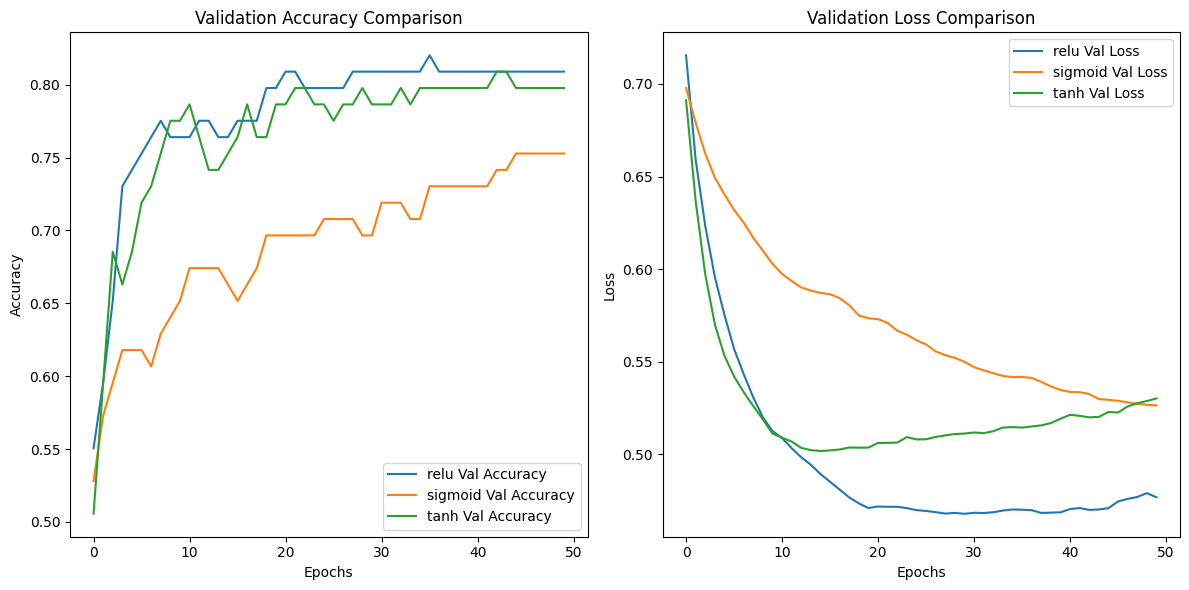


Final test accuracies:
Relu Test Accuracy: 0.8090
Sigmoid Test Accuracy: 0.7528
Tanh Test Accuracy: 0.7978


In [2]:
Ans 8

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = load_diabetes()
X = data.data
y = (data.target > 120).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model(activation_function):
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation=activation_function),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model
activation_functions = ['relu', 'sigmoid', 'tanh']

history = {}
for activation in activation_functions:
    print(f"\nTraining with {activation} activation function...")
    model = create_model(activation)
    history[activation] = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for activation, hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f'{activation} Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for activation, hist in history.items():
    plt.plot(hist.history['val_loss'], label=f'{activation} Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


print("\nFinal test accuracies:")
for activation, hist in history.items():
    final_accuracy = hist.history['val_accuracy'][-1]
    print(f"{activation.capitalize()} Test Accuracy: {final_accuracy:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training with Glorot Uniform (Xavier) initializer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training with He Normal initializer...

Training with Random Normal initializer...


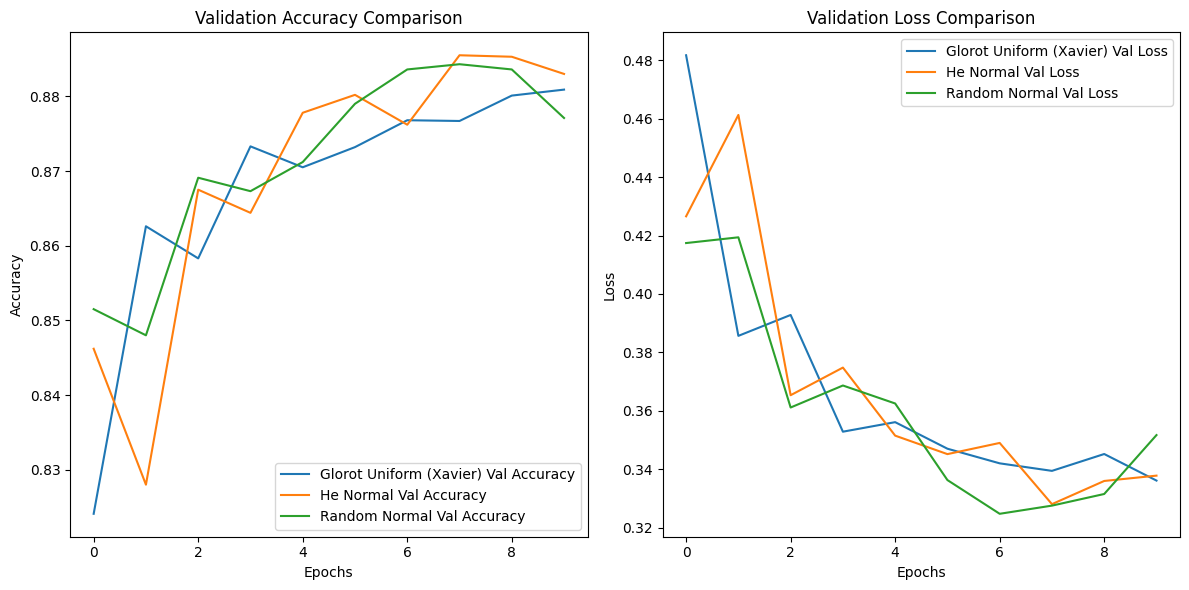


Final test accuracies:
Glorot Uniform (Xavier) Test Accuracy: 0.8809
He Normal Test Accuracy: 0.8830
Random Normal Test Accuracy: 0.8771


In [3]:
Ans 9

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_model(initializer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

initializers = {
    'Glorot Uniform (Xavier)': GlorotUniform(),
    'He Normal': HeNormal(),
    'Random Normal': RandomNormal(mean=0.0, stddev=0.05)
}

history = {}
for initializer_name, initializer in initializers.items():
    print(f"\nTraining with {initializer_name} initializer...")
    model = create_model(initializer)
    history[initializer_name] = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for initializer_name, hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f'{initializer_name} Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
for initializer_name, hist in history.items():
    plt.plot(hist.history['val_loss'], label=f'{initializer_name} Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

print("\nFinal test accuracies:")
for initializer_name, hist in history.items():
    final_accuracy = hist.history['val_accuracy'][-1]
    print(f"{initializer_name} Test Accuracy: {final_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


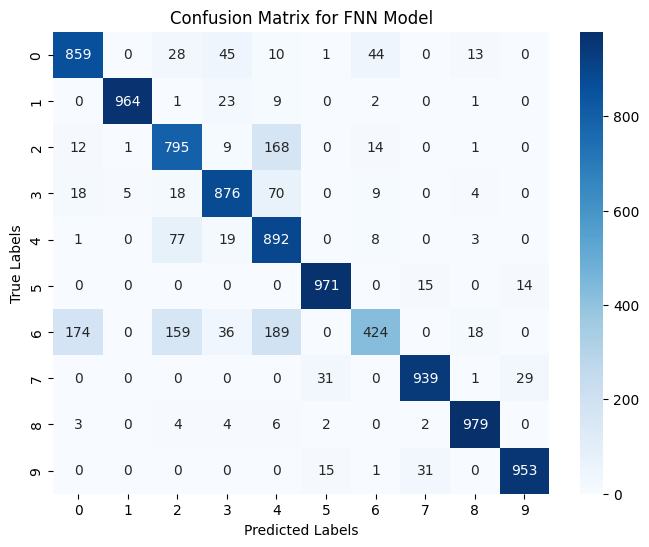

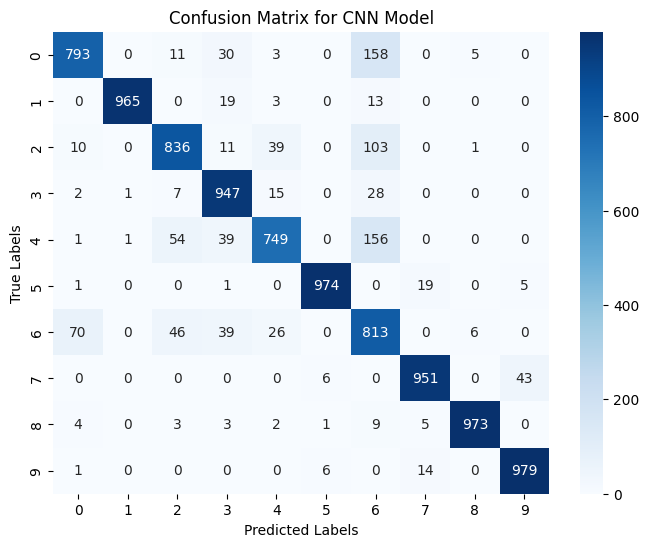

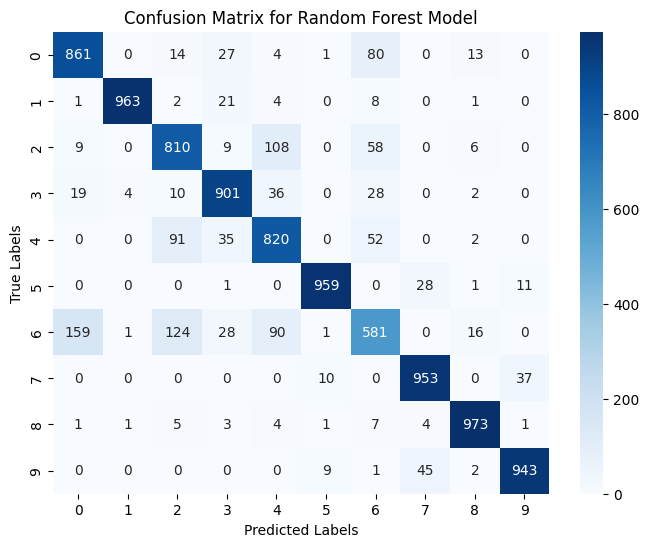

Accuracy of FNN Model: 0.8652
Accuracy of CNN Model: 0.8980
Accuracy of Random Forest Model: 0.8764


In [4]:
Ans 10

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

def create_fnn_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


fnn_model = create_fnn_model()
fnn_model.fit(x_train, y_train_onehot, epochs=5, batch_size=32, verbose=0)
cnn_model = create_cnn_model()
cnn_model.fit(x_train_cnn, y_train_onehot, epochs=5, batch_size=32, verbose=0)

x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_flat, y_train)

fnn_pred = fnn_model.predict(x_test)
fnn_pred_classes = np.argmax(fnn_pred, axis=1)
cnn_pred = cnn_model.predict(x_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
rf_pred = rf_model.predict(x_test_flat)

fnn_conf_matrix = confusion_matrix(y_test, fnn_pred_classes)
cnn_conf_matrix = confusion_matrix(y_test, cnn_pred_classes)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)


def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


plot_confusion_matrix(fnn_conf_matrix, "Confusion Matrix for FNN Model")
plot_confusion_matrix(cnn_conf_matrix, "Confusion Matrix for CNN Model")
plot_confusion_matrix(rf_conf_matrix, "Confusion Matrix for Random Forest Model")
fnn_accuracy = accuracy_score(y_test, fnn_pred_classes)
cnn_accuracy = accuracy_score(y_test, cnn_pred_classes)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Accuracy of FNN Model: {fnn_accuracy:.4f}")
print(f"Accuracy of CNN Model: {cnn_accuracy:.4f}")
print(f"Accuracy of Random Forest Model: {rf_accuracy:.4f}")
